# Example with test images automatically generated
This example is a simple transposition of the one provided with digHolo but using the pyDigHolo module.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pyDigHolo import digHolo
from functions import colorize

## Path of digHolo ```.dll``` or ```.so```

In [2]:
# dll_path = "/path/to/libdigholo.dll|so"
dll_path = "./digHolo.dll"

## Load pyDigHolo module

In [3]:
dh = digHolo(dll_path)
# Redirect console to file
# dh.RedirectConsole('digholo.log')

In [4]:
#Number of camera frames
#frameCount = frameBuffer.shape[0]
frameCount = 45
batchCount = frameCount

#Width/height of camera frames
frameWidth = 320
frameHeight = 256
#frameWidth = frameBuffer.shape[2]
#frameHeight = frameBuffer.shape[1]

#Camera pixel size (microns)
pixelSize = 20e-6

#Centre wavelength (nanometres)
lambda0 = 1565e-9

#Polarisation components per frame
polCount = 2

#Width/height of window to FFT on the camera. (pixels)
nx = 128
ny = 128

#Amount of detail to print to console. 0: Console off. 1: Basic info. 2:Debug mode. 3: You've got serious issues
verbosity = 2

#Sets the resolution mode of the reconstructed field.
#0 : Full resolution. Reconstructed field will have same pixel
#size/dimensions as the FFT window.
#1 : Low resolution. Reconstructed field will have dimension of the IFFT
#window. 
resolutionMode = 1

#Specifies the number of HG mode groups to decompose the beams in.
#Total modes = sum(1:maxMG). maxMG=1->1 mode, maxMG=9->45 modes.
maxMG = 9

## Generate frames

In [5]:
frames = dh.FrameSimulatorCreateSimple( 
        frameCount, 
        frameWidth, 
        frameHeight, 
        pixelSize,
        lambda0, 
        polCount, 
        dataType = 'Python')

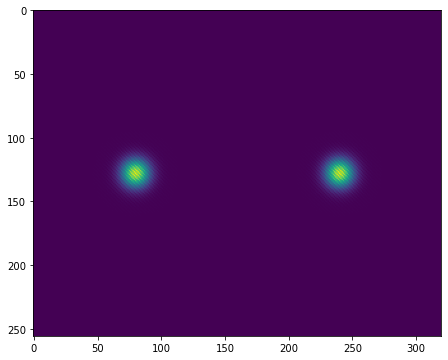

In [6]:
ind = 0

plt.figure(figsize=(14,6))
plt.imshow(frames[ind])

## Configure off-axis

In [7]:
dh.ConfigOffAxis(
    [frameWidth, frameHeight],
    [nx, ny],
    resolutionMode,  
    pixelSize,
    lambda0,
    maxMG,
    polCount
)

## Configure Auto-align

In [8]:
dh.ConfigSetAutoAlign(
    enable_align_beam_centre=True,
    enable_align_defocus=True,
    enable_align_tilt=True,
    enable_align_basis_waist=True,
    enable_align_fourier_win_radius=True,
)
# We choose here to fix the FFT window radius to a chosen value
dh.SetFourierWindowRadius(0.15)

## Perform auto-calibration and retrieve resulting fields

In [9]:
dh.SetBatch(frameCount, frames, dataType = 'Python')
dh.AutoAlign()
cpx_imgs = dh.GetFields()

45


## Show the calibration parameters

In [10]:
print(dh.GetFramePixelSize())
print(dh.GetWavelengthCentre())
print(dh.GetFourierWindowRadius())
print(dh.GetBeamCentre())
print(dh.GetDefocus())
print(dh.GetTilt())


1.9999999494757503e-05
1.565000047776266e-06
0.7033793330192566
[-0.0016000046161934733, -5.781611300825773e-10]
-0.0003625154495239258
[1.5232495069503784, -1.5231757164001465]


## Display the recovered complex fields

(-0.5, 95.5, 47.5, -0.5)

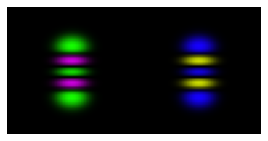

In [15]:
ind = 10

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(colorize(cpx_imgs[ind]))
plt.axis('off')
